## Let's start by loading necessary useful libraries

In [10]:
import numpy as np
import math
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy import *
from collections import Counter
import seaborn as sn
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Next up original data will be loaded

In [11]:
csvFile = "../data/original/data.csv"
dataset = pd.read_csv(csvFile)
display(dataset.head(5))
data = dataset.values
dataFeatures = dataset.columns

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

## Then lets check general details of the data

In [12]:
original_row_amount = len(dataset.index)
print(f"Row amount: {original_row_amount}")
original_features_amount = len(dataset.columns)
print(f"Features amount: {original_features_amount}")

pd.set_option('display.max_columns', None)
dataset.describe()

Row amount: 6819
Features amount: 96


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

#### Table analysis
From the above table we can see that some features have values that are near identical between entries. This is either due to data being bad, or alternatively scaling being bad due to outliers. At least following features have very similar values:
- Operating Gross Marging
- Realized Sales Gross Marging
- Operating Profit Rate
- Pre-tax net Interest Rate
- After-tax net Interest Rate
- Non-industry income and expenditure/revanue
- Continuous interest rate

Lets also clarify the situation by using box plot.

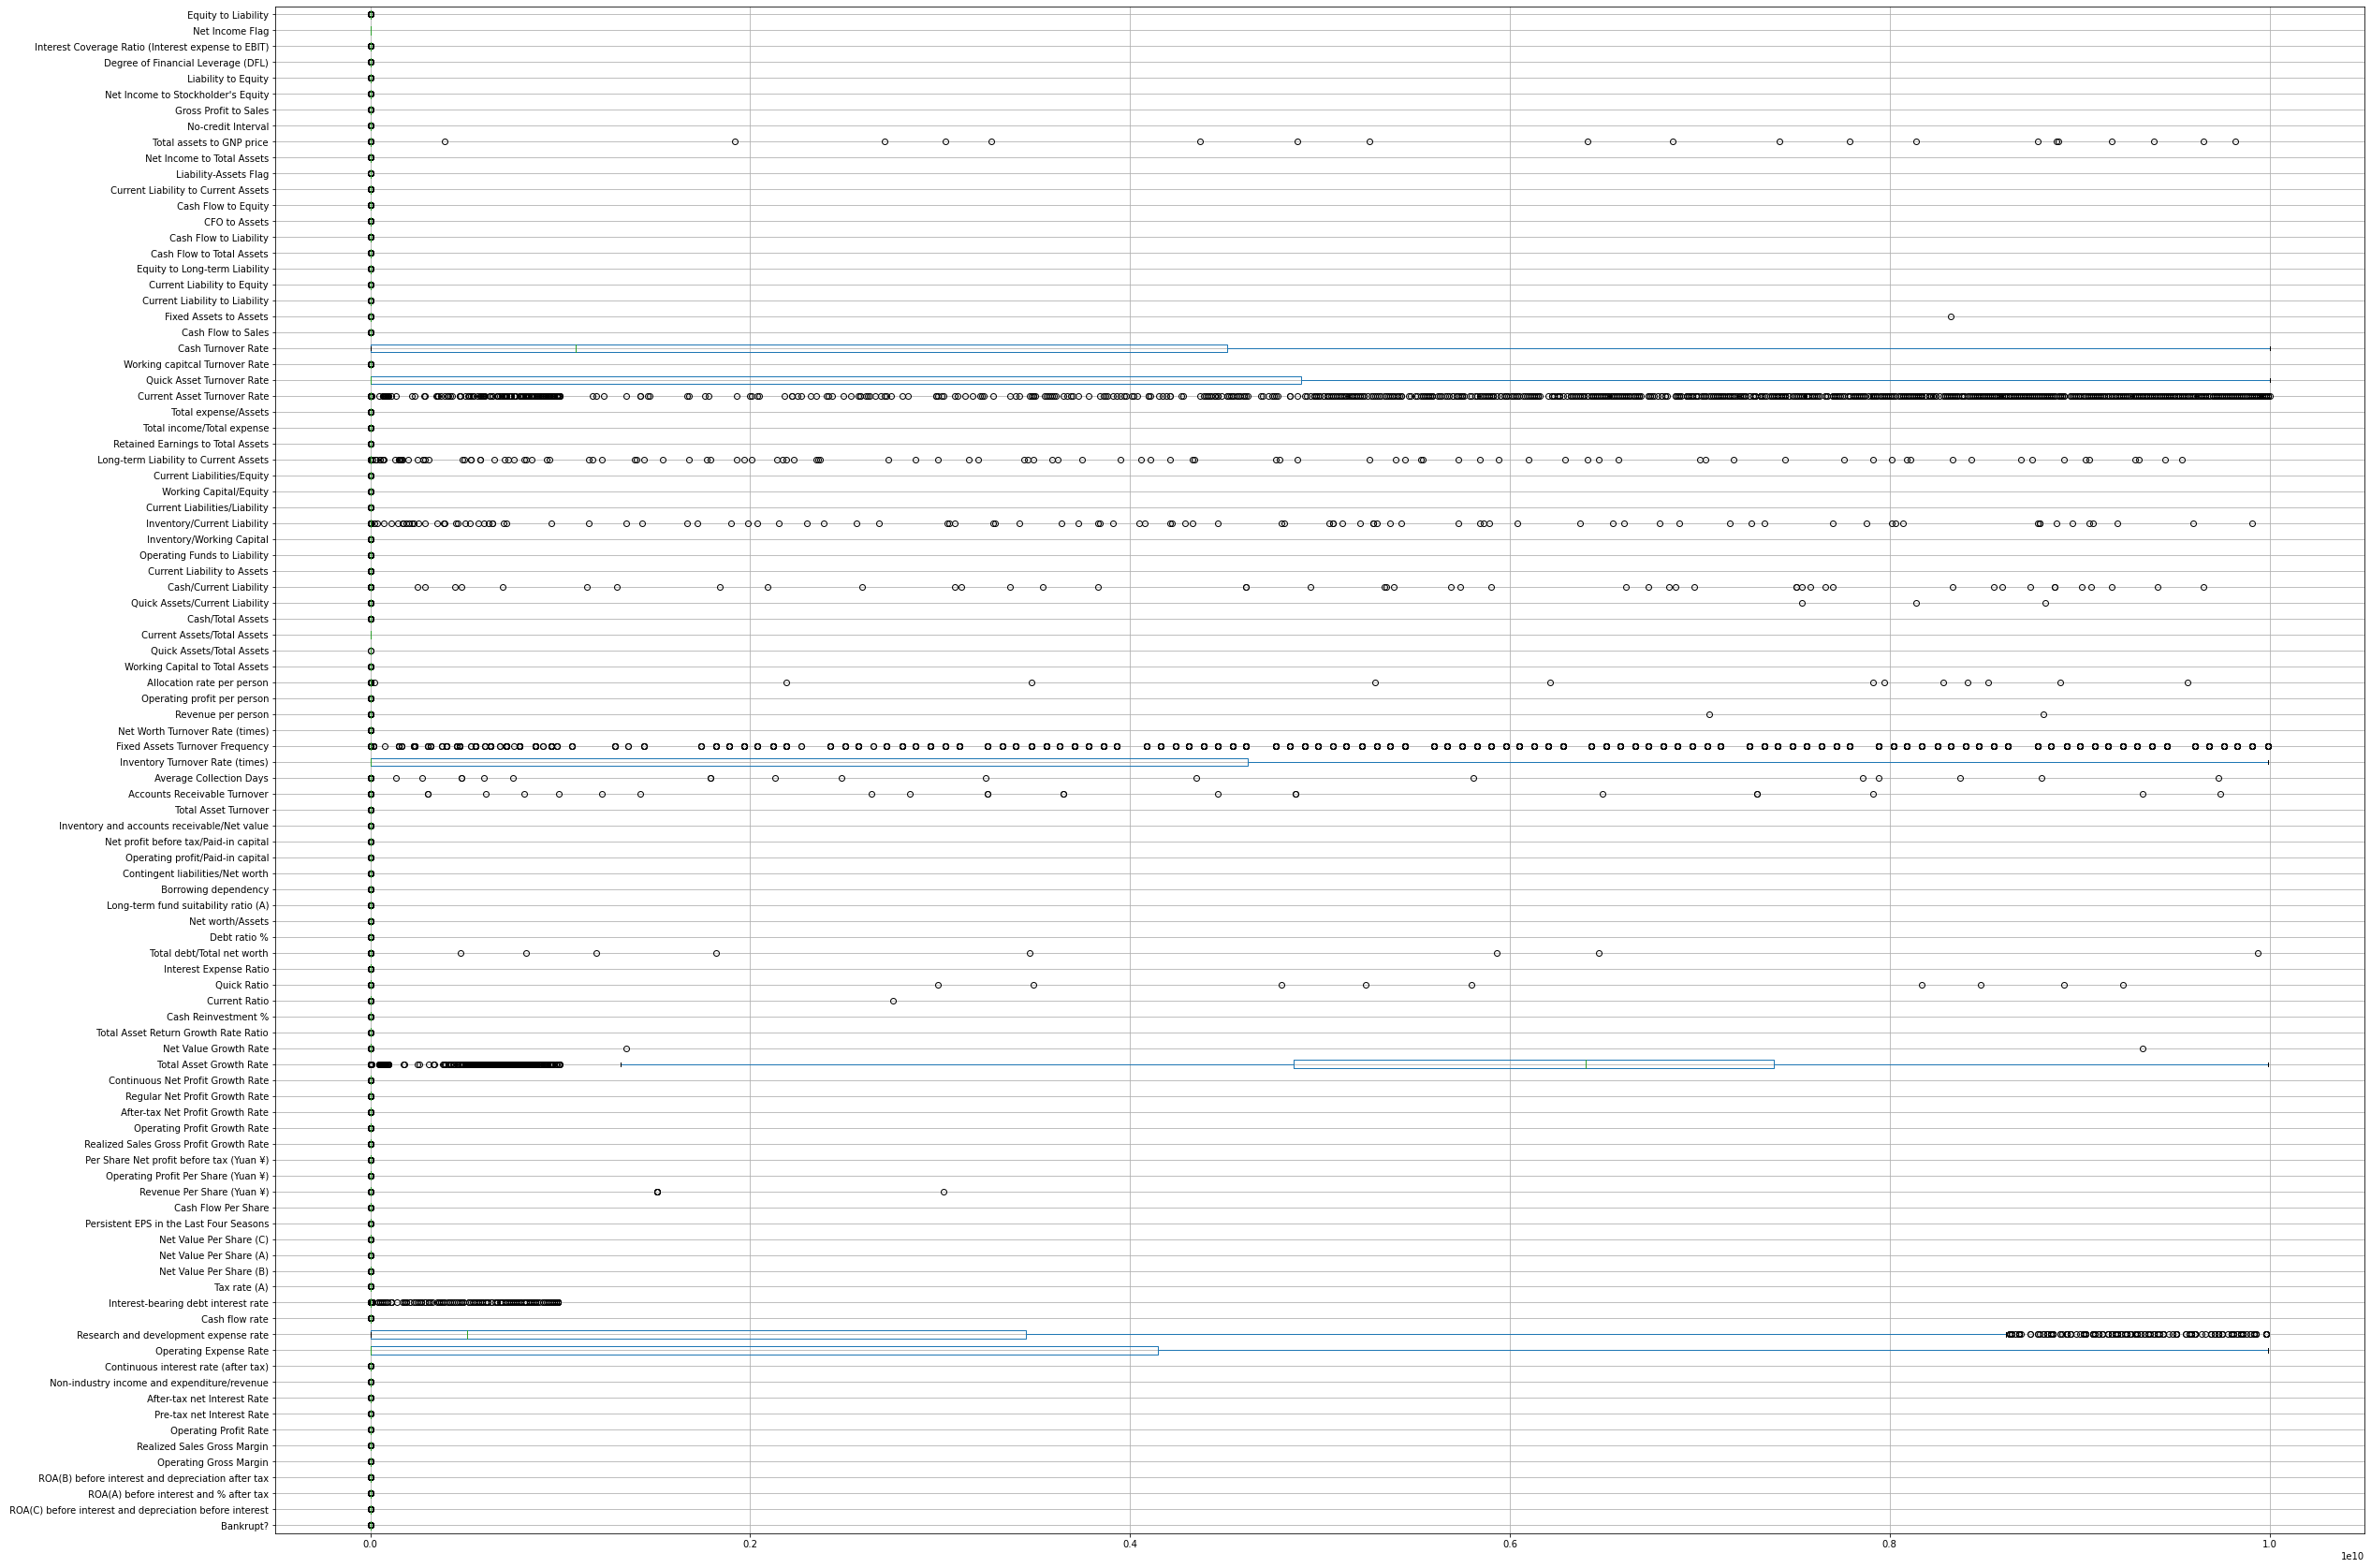

In [13]:
plt.rcParams["figure.figsize"] = (40,30)
dataset.boxplot(vert=False)

plt.show()

Based on these metrics / plots, it can be seen that there are indeed some values that are heavily skewed. Let's try to fix the skewes by removing outliers via thresholds and then rebalancing the data using min max.

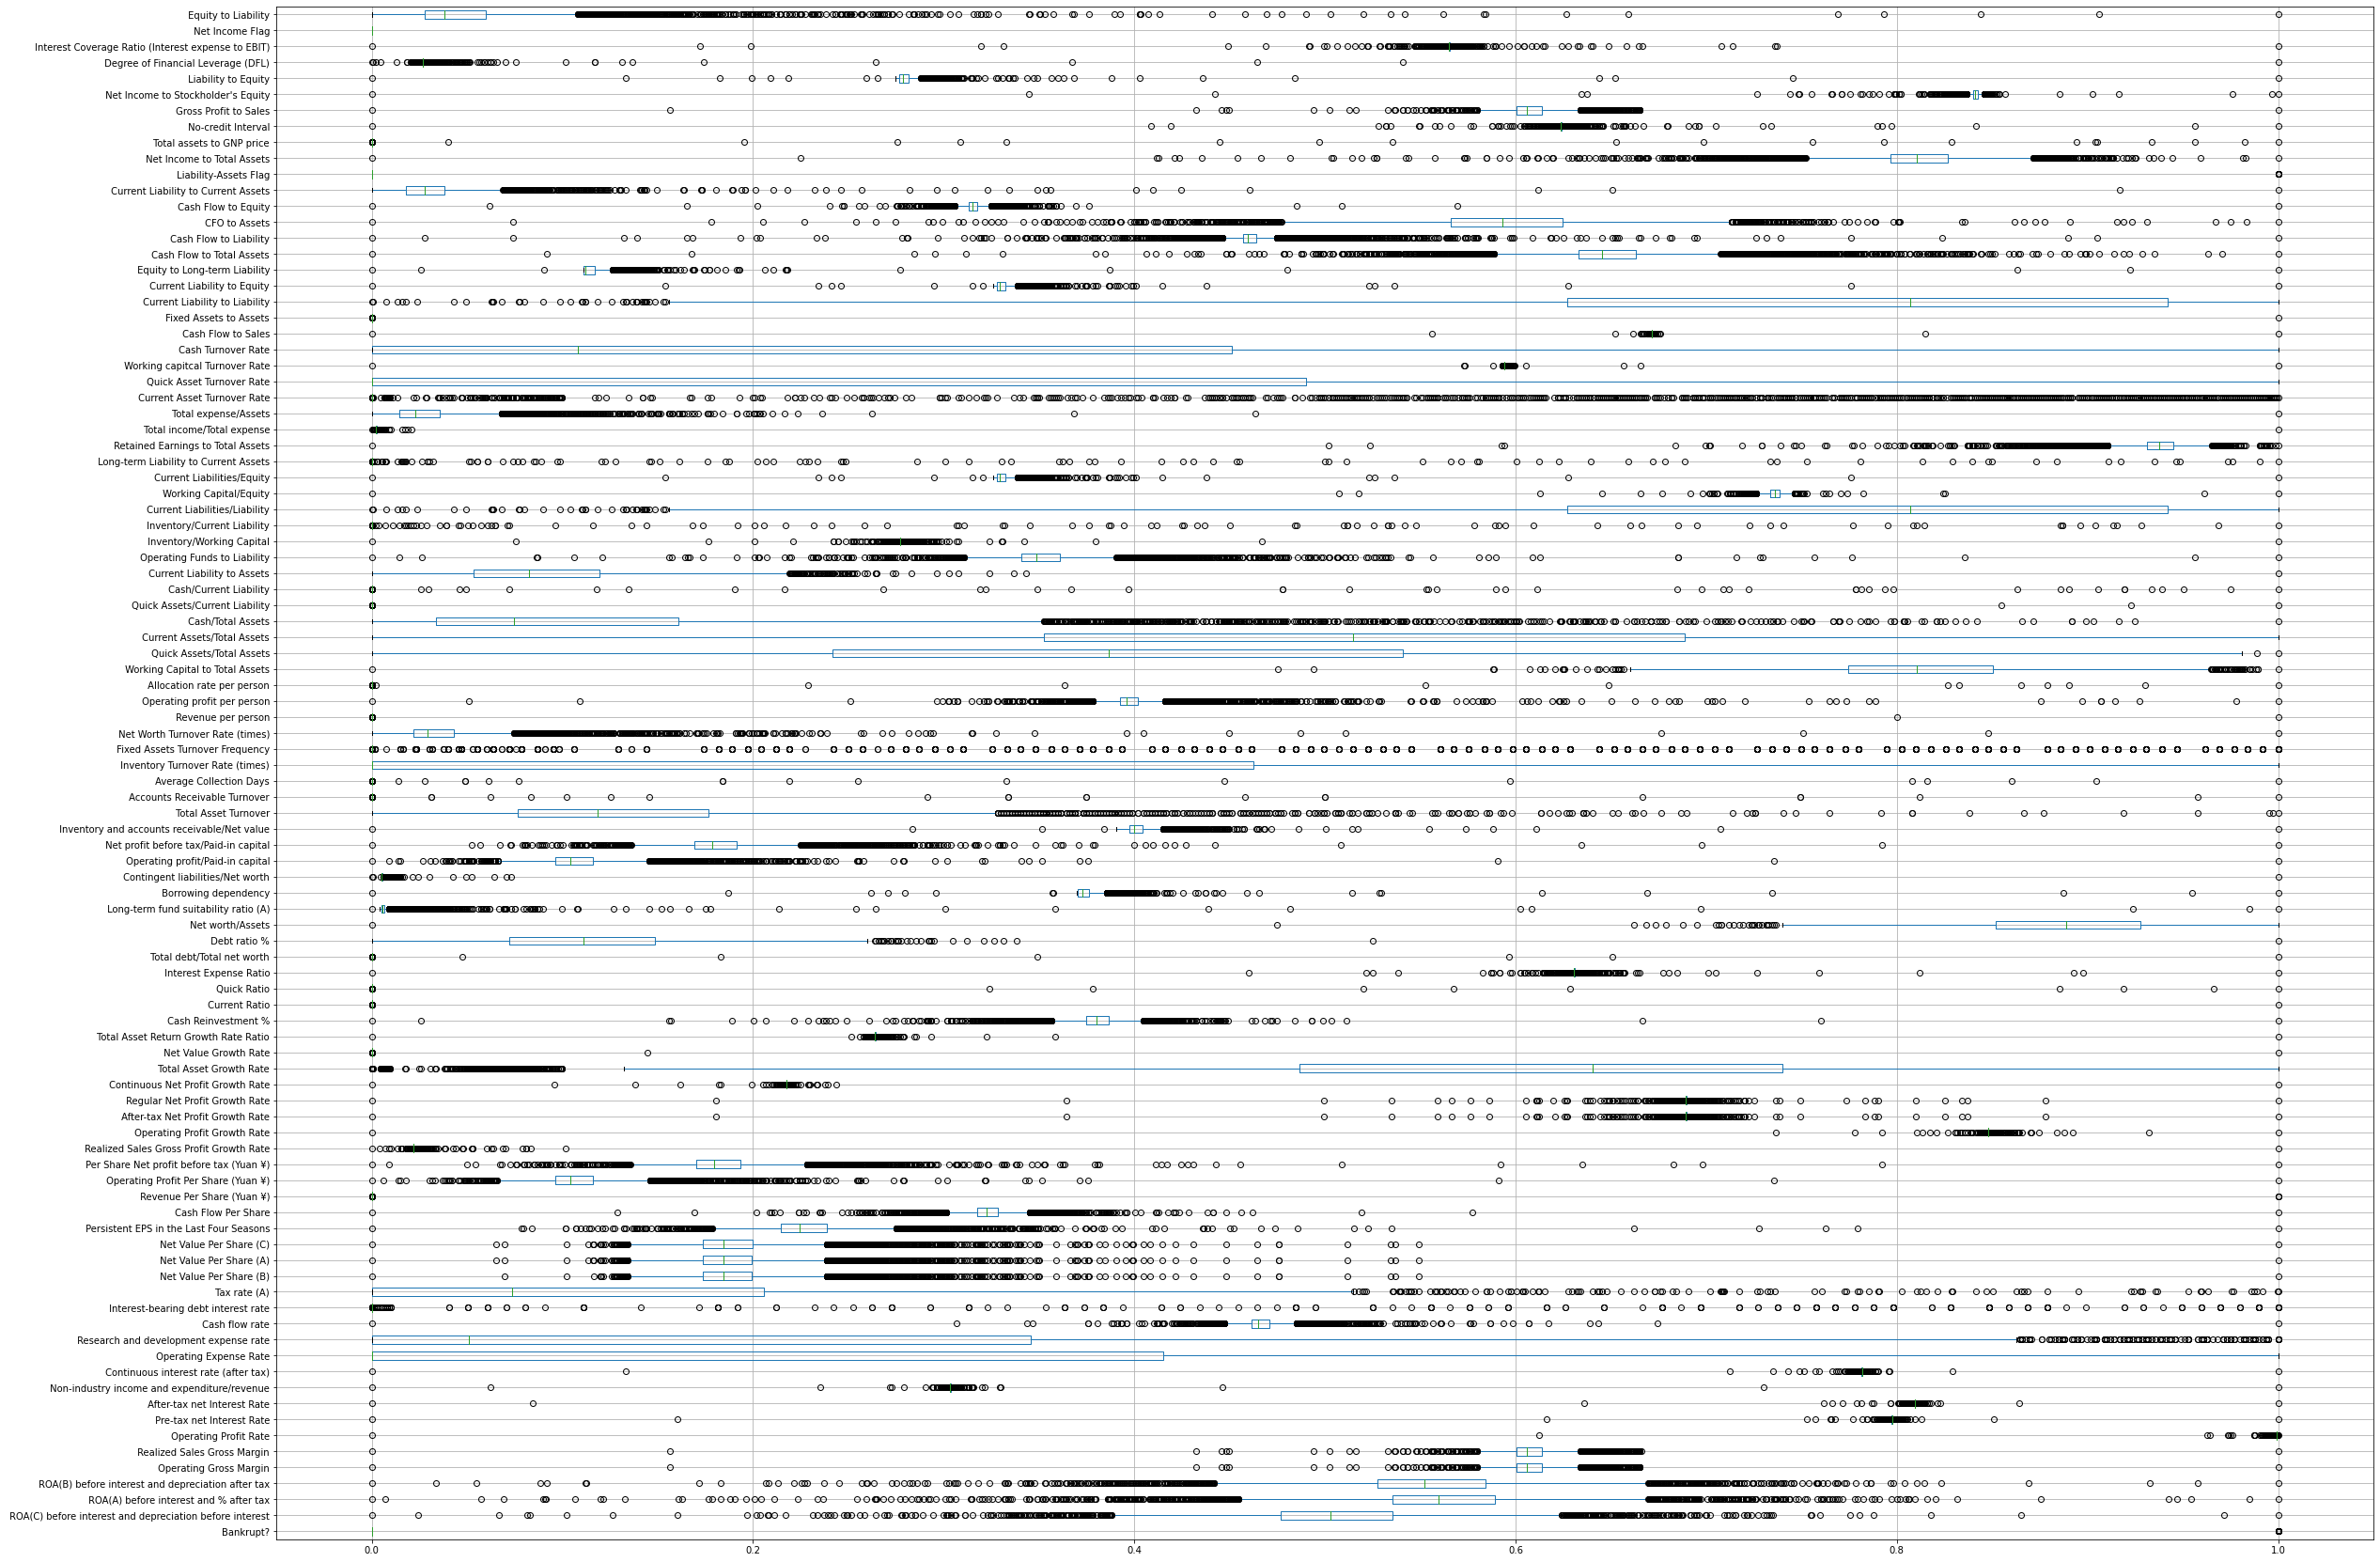

In [14]:
# Remove outliers based on the equity to liability value
dataset = dataset[dataset[" Equity to Liability"] < 0.9]

# Rebalance data using min max scaler
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

# Show new results
dataset.boxplot(vert=False)
plt.show()

That looks already a lot better, there are still some features that are clearly dominated by outliers, lets still try to fix those.

Data entries / rows left: 99.5601%


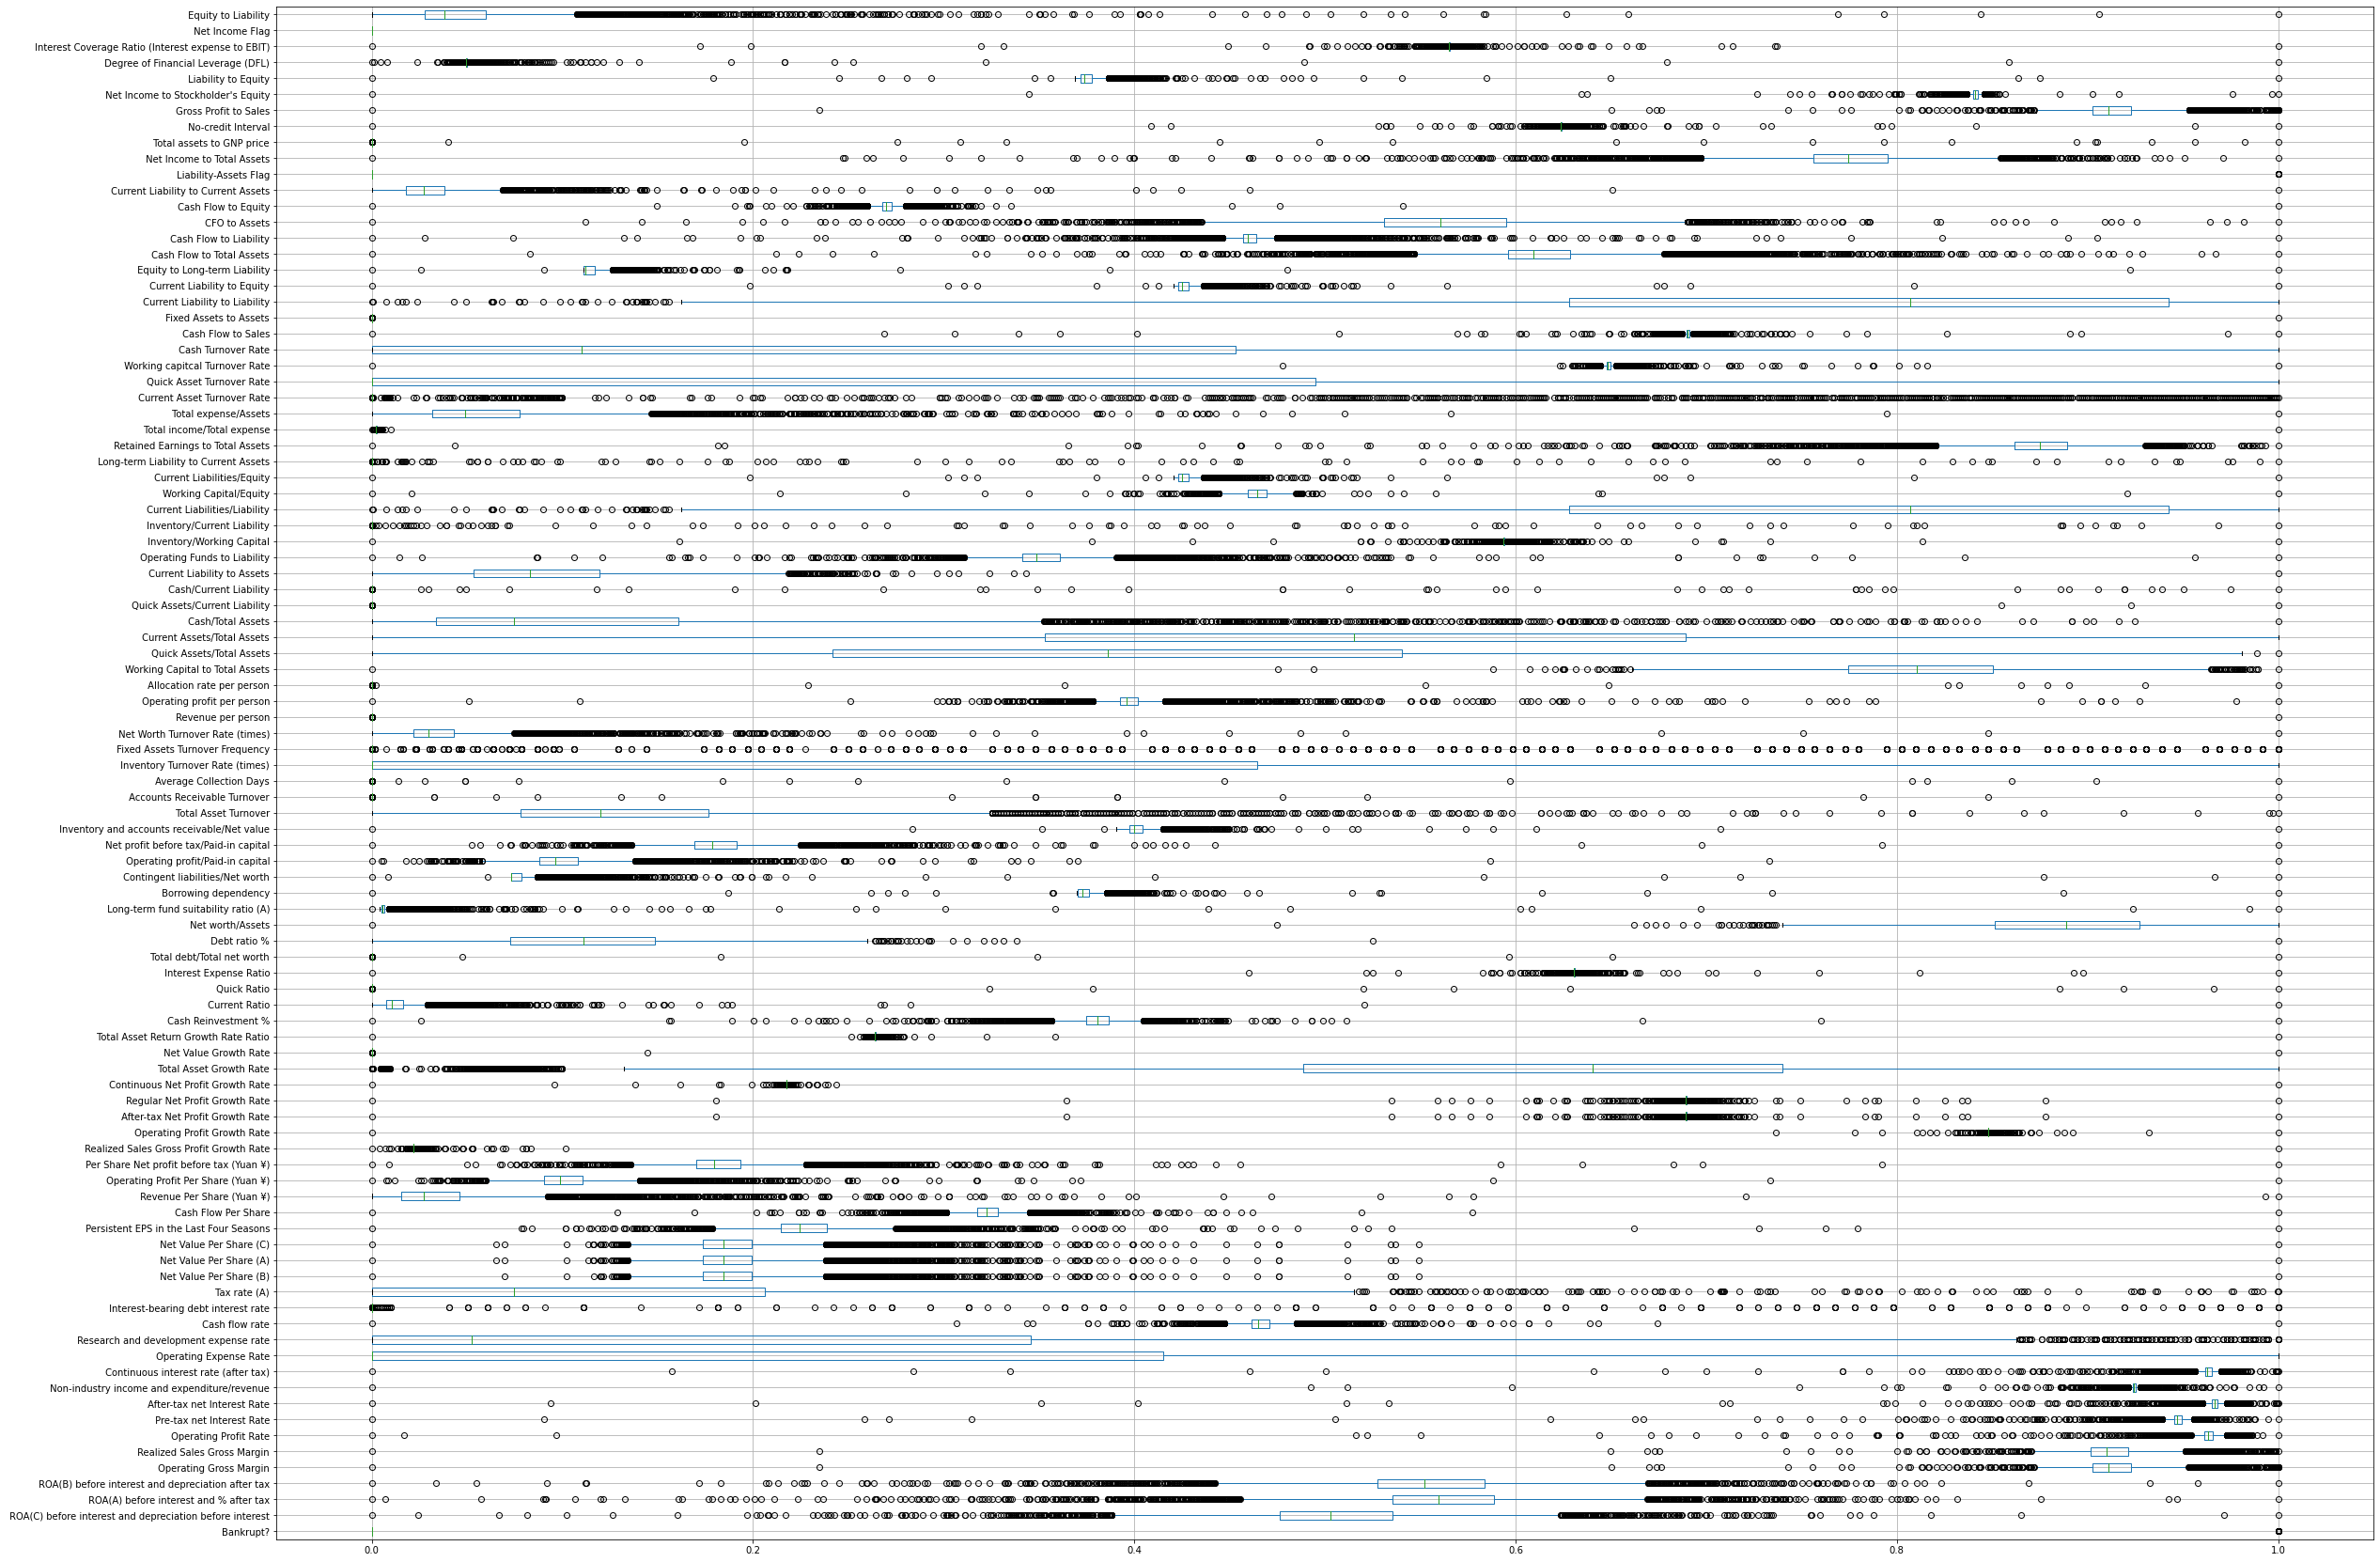

In [15]:
# Remove outliers based on other values
dataset = dataset[dataset[" Degree of Financial Leverage (DFL)"] < 0.9]
dataset = dataset[dataset[" Net Income to Total Assets"] > 0.2]
# Current liability has large spike in the end that can't be removed
# dataset = dataset[dataset[" Current Liability to Liability"] < 0.9]
dataset = dataset[dataset[" Current Liabilities/Equity"] < 0.9]
dataset = dataset[dataset[" Cash Flow to Sales"] < 0.9]
dataset = dataset[dataset[" Working capitcal Turnover Rate"] < 0.9]
dataset = dataset[dataset[" Continuous interest rate (after tax)"] > 0.2]
dataset = dataset[dataset[" Non-industry income and expenditure/revenue"] > 0.2]
dataset = dataset[dataset[" After-tax net Interest Rate"] > 0.2]
dataset = dataset[dataset[" Pre-tax net Interest Rate"] > 0.2]
dataset = dataset[dataset[" Continuous interest rate (after tax)"] < 0.8]
dataset = dataset[dataset[" Non-industry income and expenditure/revenue"] < 0.8]
dataset = dataset[dataset[" After-tax net Interest Rate"] < 0.9]
dataset = dataset[dataset[" Pre-tax net Interest Rate"] < 0.8]
dataset = dataset[dataset[" Operating Profit Rate"] > 0.2]

# Rebalance the data using min max scaler
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

# Show how many rows we still have left
print(f"Data entries / rows left: {round(len(dataset.index) / original_row_amount * 100, 4)}%")

# Show new results
dataset.boxplot(vert=False)
plt.show()

In [16]:
# Present also dataset key metrics
dataset.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6.789000e+03,6.789000e+03,6789.000000,6.789000e+03,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6.789000e+03,6789.000000,6789.000000,6789.000000,6.789000e+03,6789.000000,6.789000e+03,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6.789000e+03,6.789000e+03,6.789000e+03,6.789000e+03,6789.000000,6.789000e+03,6789.000000,6.789000e+03,6789.000000,6789.000000,6789.000000,6789.000000,6.789000e+03,6.789000e+03,6789.000000,6789.000000,6789.000000,6.789000e+03,6789.000000,6789.000000,6789.000000,6.789000e+03,6789.000000,6789.000000,6789.000000,6.789000e+03,6.789000e+03,6789.000000,6.789000e+03,6789.000000,6.789000e+03,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6.789000e+03,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,6789.0,6789.000000
mean,0.032258,0.505048,0.558369,0.553448,0.913839,0.912615,0.961503,0.945188,0.964713,0.923906,0.961163,2.000005e-01,1.961453e-01,0.467359,1.659979e-02,0.11531

Dataset looks now already a lot better. With only a minimal reduction of data we were able to distribute the data already much better. However there are still certain features, whom distribution seems quite concentrated. Let's try StandardScaling scaler algorithm to improve the situation, which scales the data based on the normal distribution.

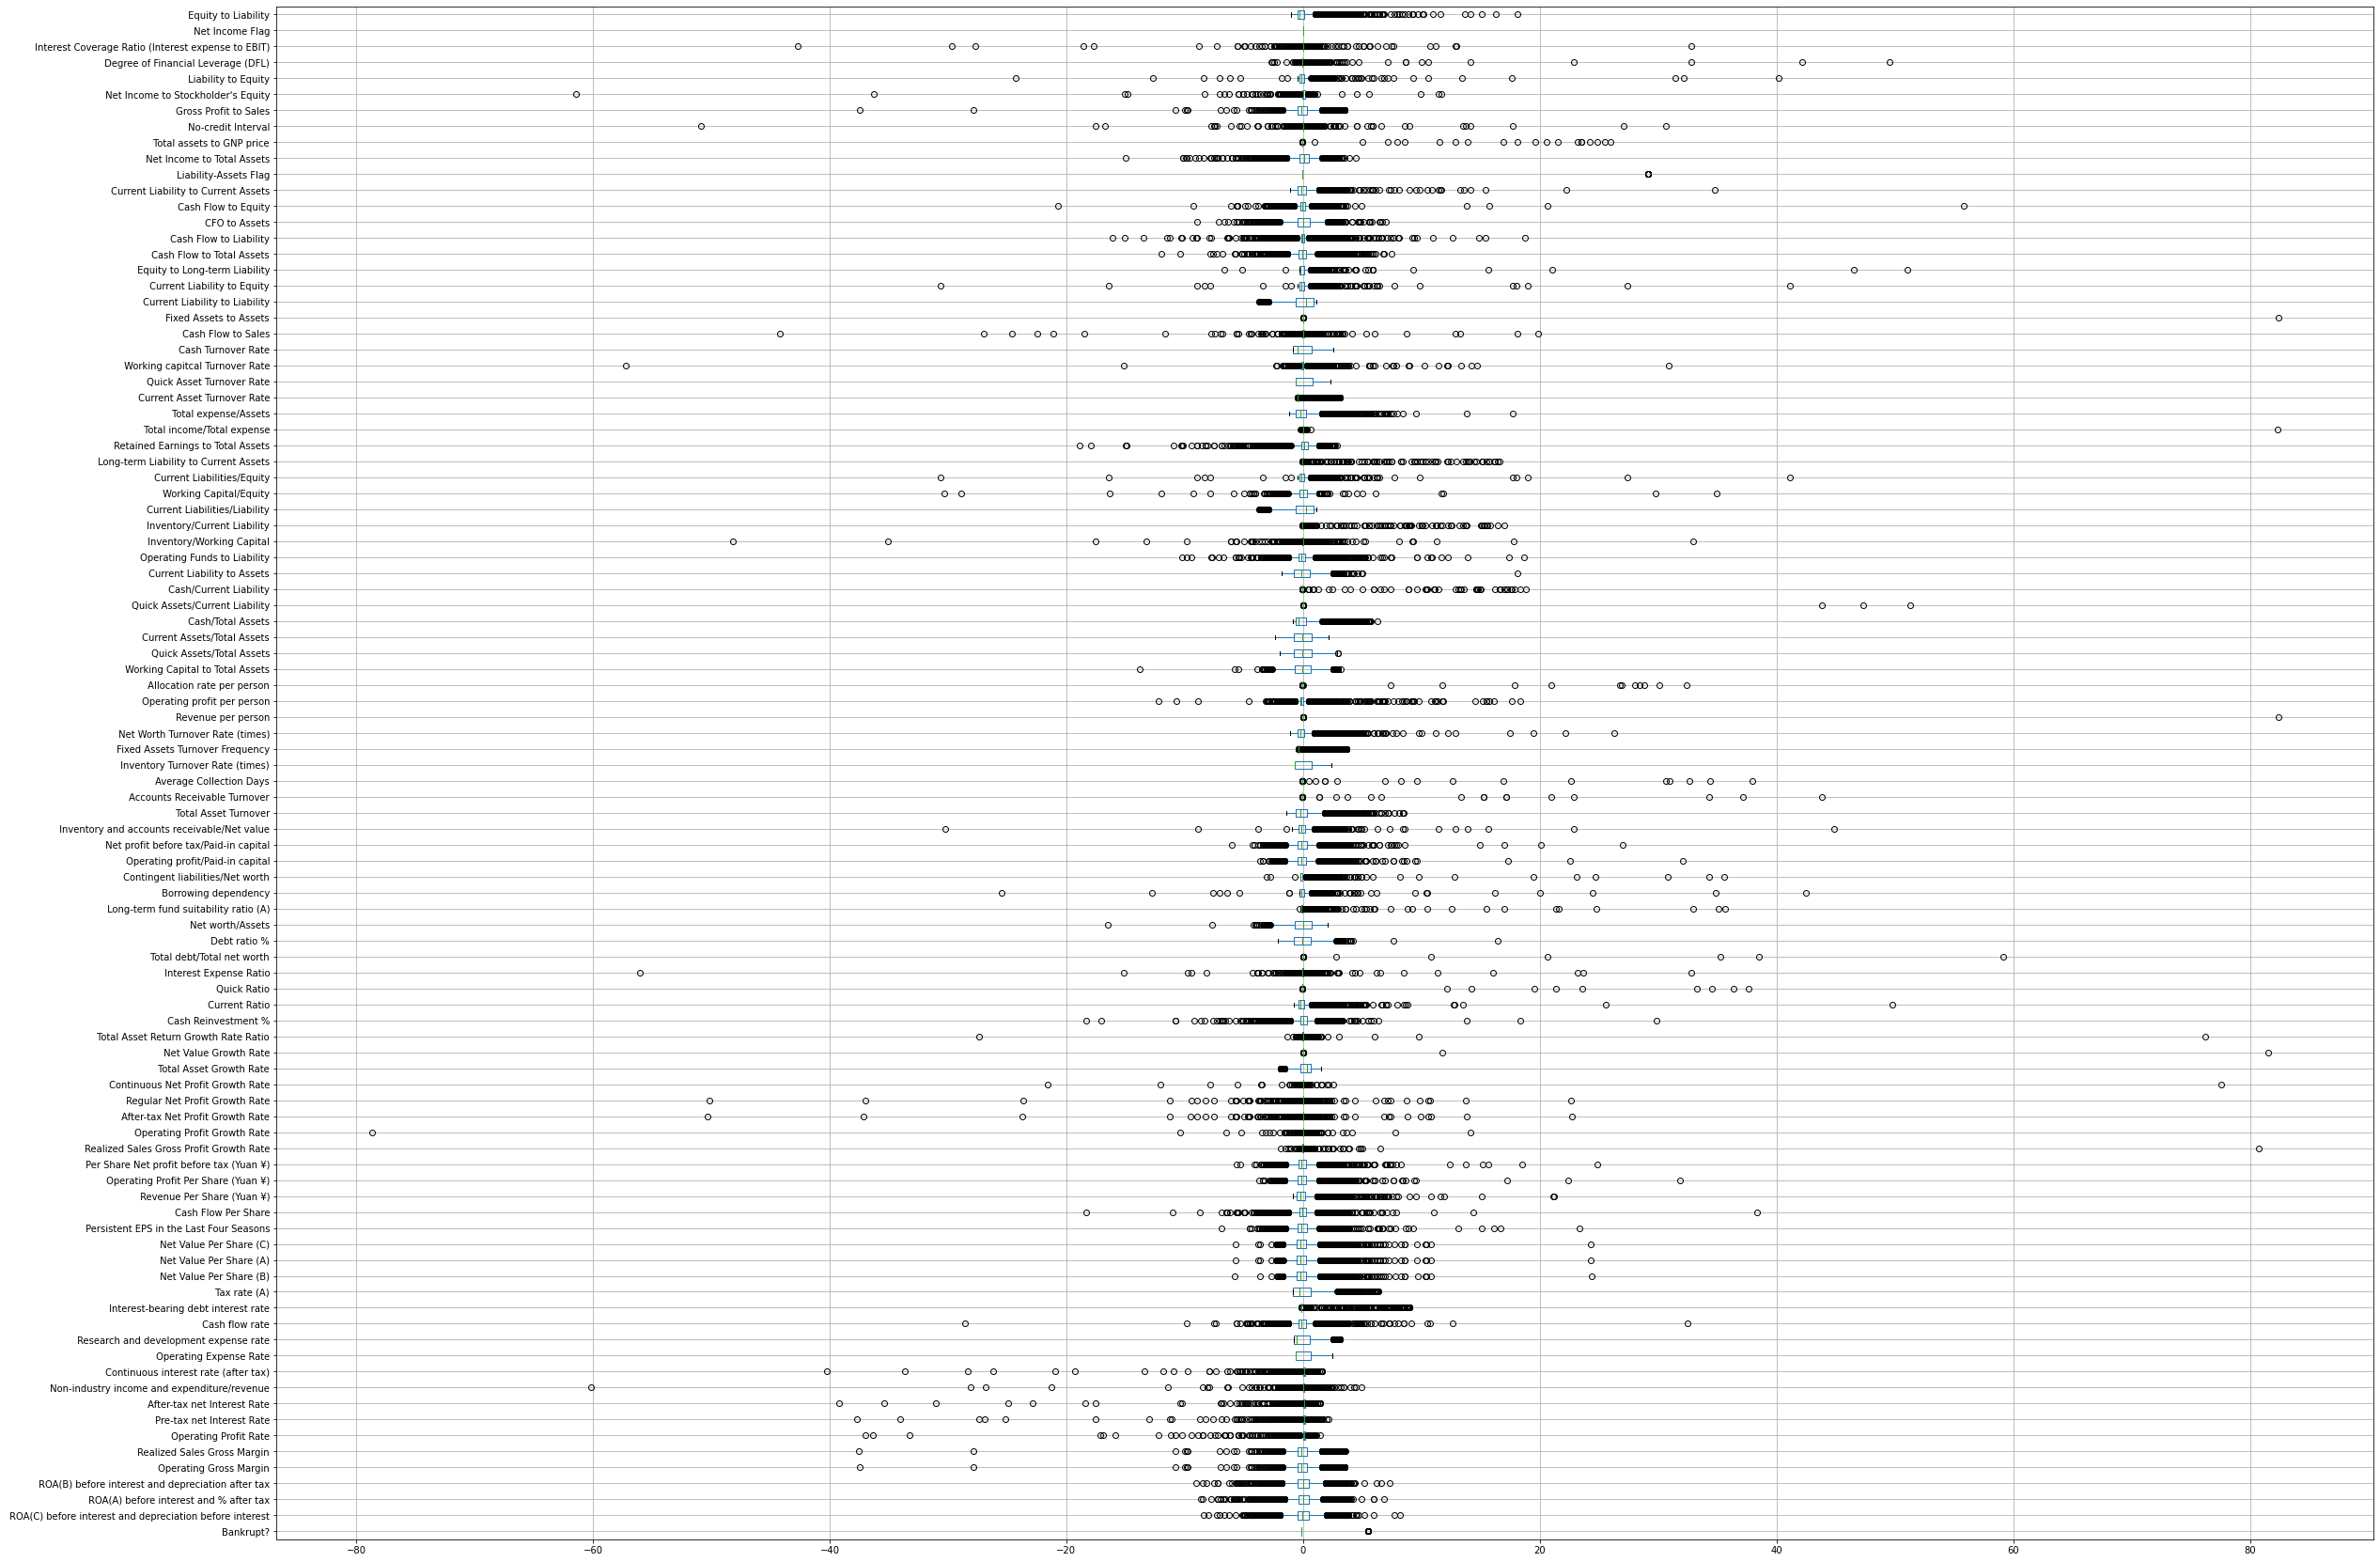

In [17]:
# Rebalance the data using standard scaler
scaler = StandardScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

# Show new results
dataset.boxplot(vert=False)
plt.show()

The data looks clearer now. However now the remaining outliers are especially visible. In addition some empty features, or features with only a few different values can be seen also especially well from this picture.

Let's remove features that have only extreme values and cut certain percentage from the data that is near left or right edge.

Data entries / rows left: 87.5495%
Features / columns left: 45.8333%


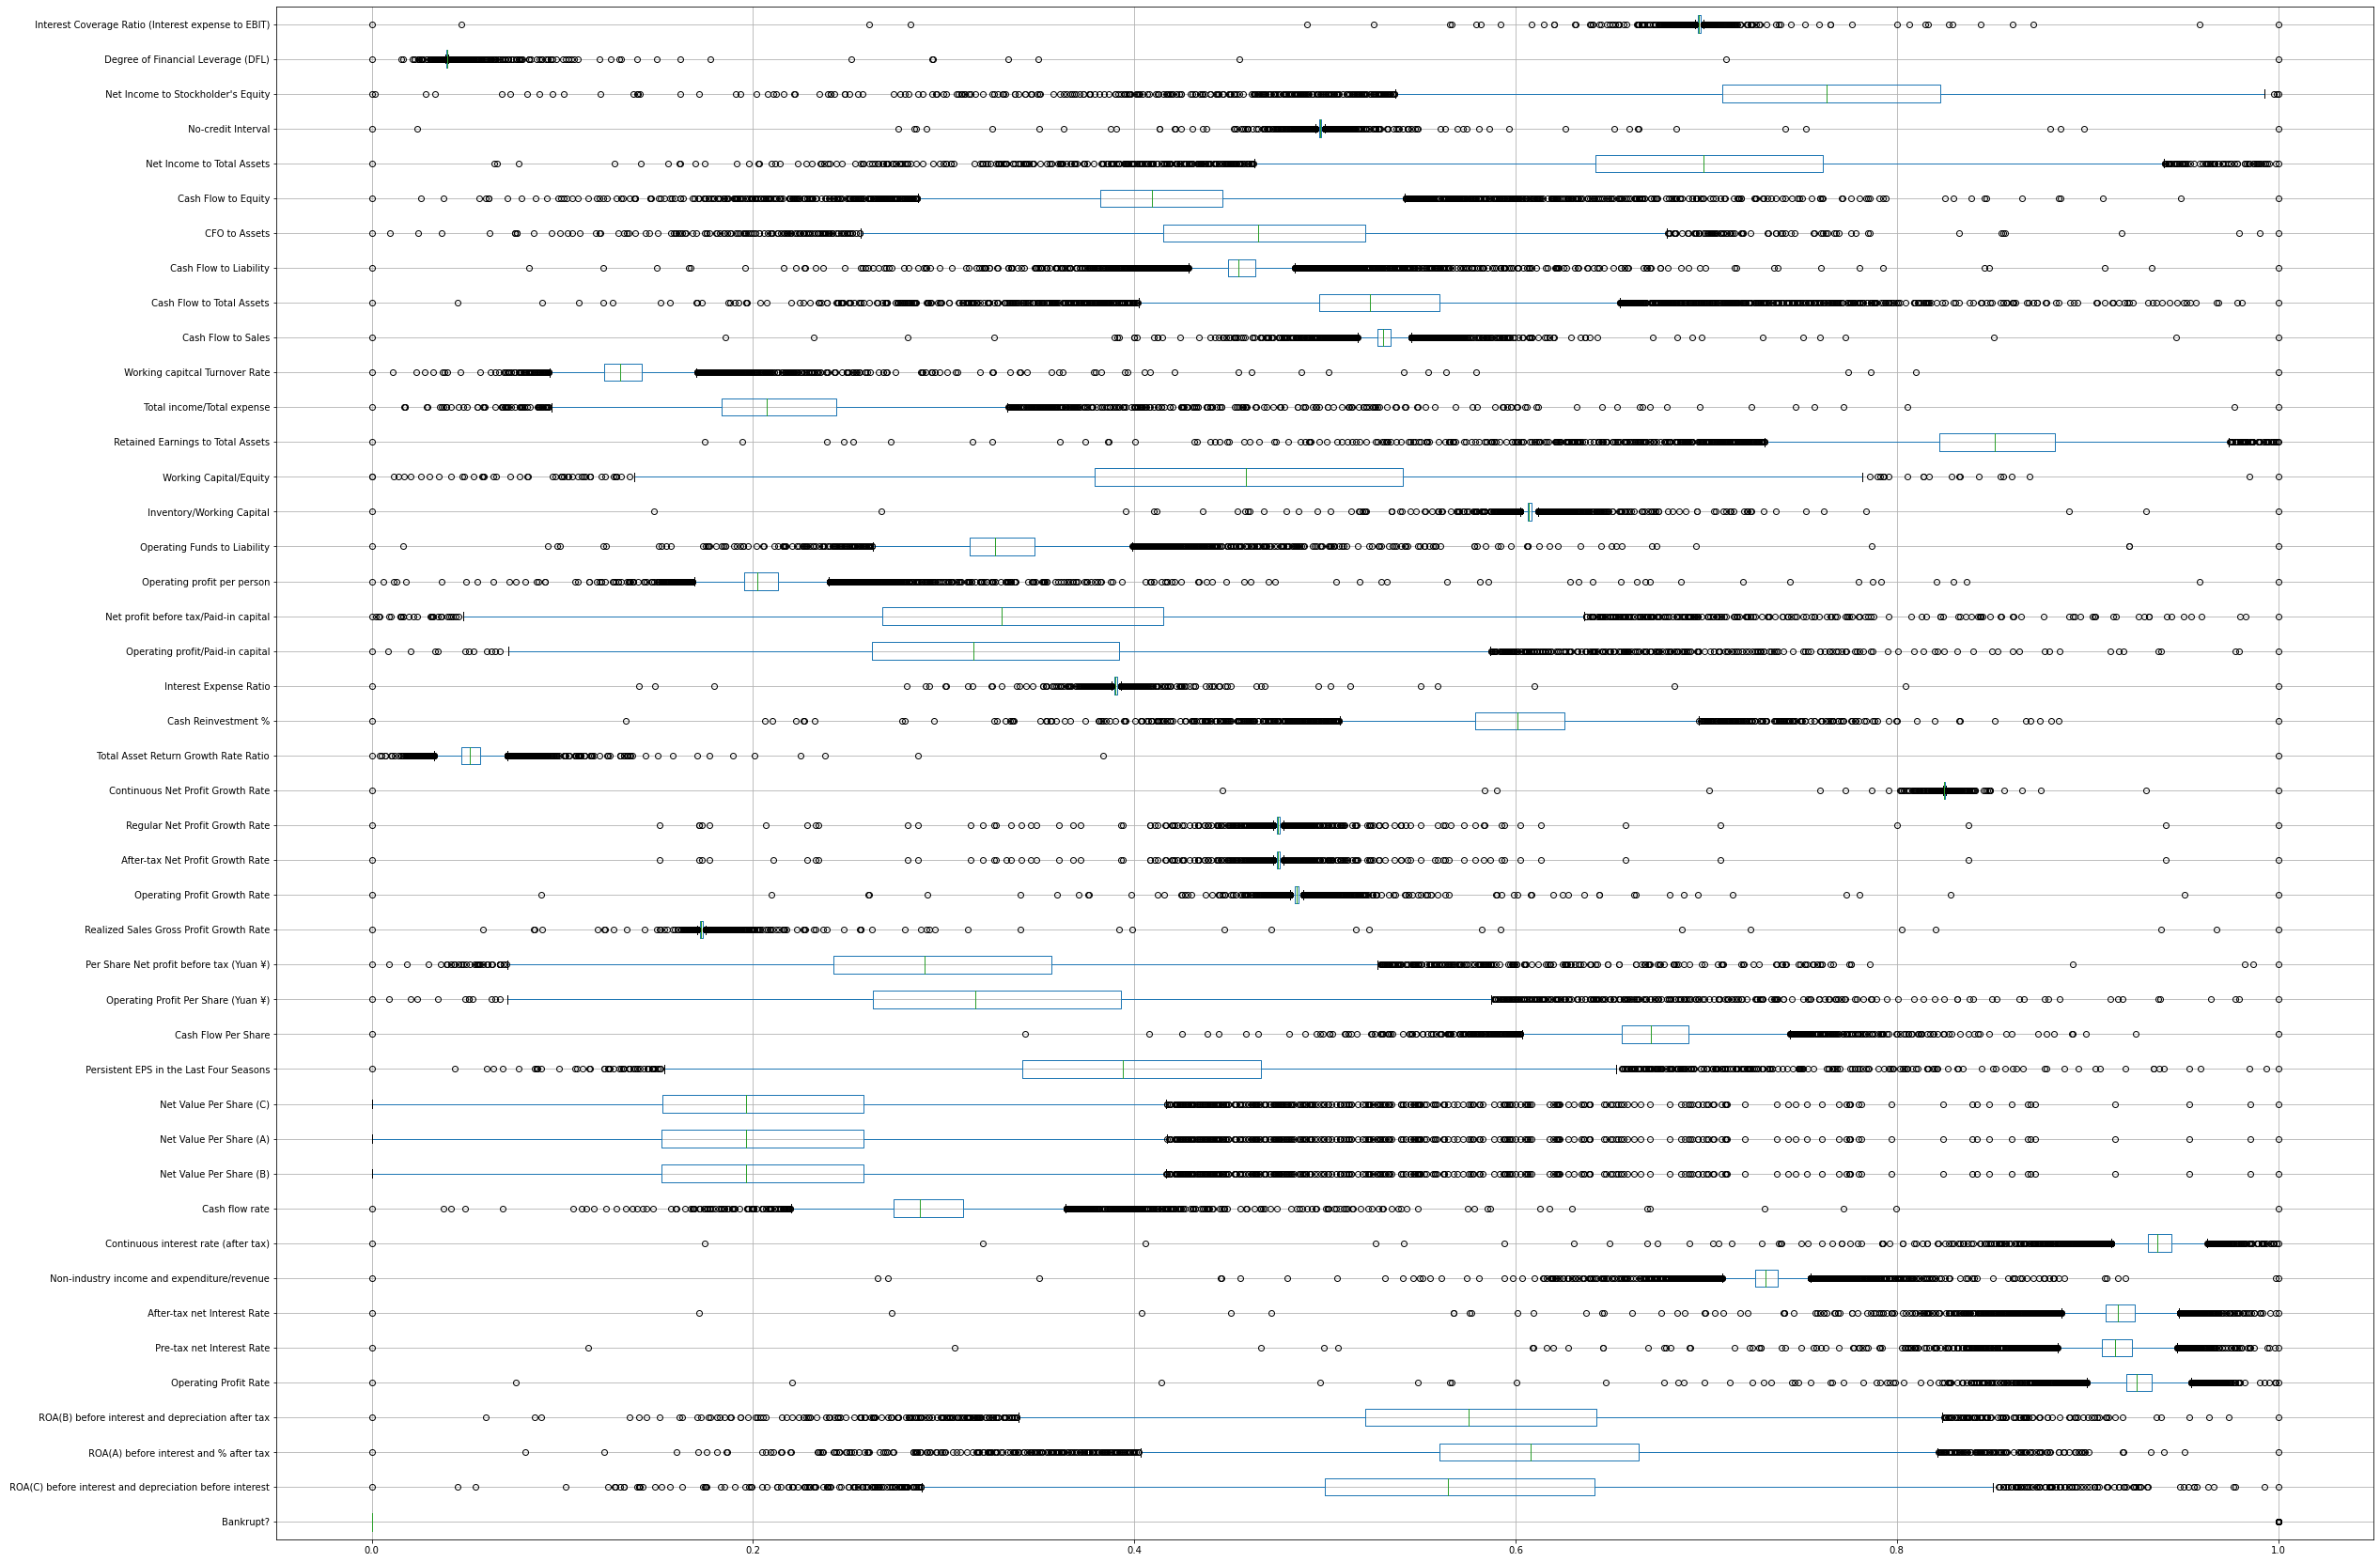

In [18]:
# Remove netincome flag, because it causes problems with heuristics
dataset = dataset.drop(columns=[" Net Income Flag"])

# Remove furthest x% from all columns unless columns still have high number of extreme values
# Remove columns that have high number of extreme values.
treshold = 50
cut_percentage = 0.25
percentage_modifier = 1 - cut_percentage
columns_to_be_removed = {}
for column in dataset.columns:
    lower_cut = dataset[column].min() * percentage_modifier
    upper_cut = dataset[column].max() * percentage_modifier
    if sum(dataset[column] < lower_cut) < treshold:
        dataset = dataset[dataset[column] > lower_cut]
    else:
        columns_to_be_removed[column] = True
    if sum(dataset[column] > upper_cut) < treshold:
        dataset = dataset[dataset[column] < upper_cut]
    else:
        columns_to_be_removed[column] = True

# Remove marked columns except Bankrupt? label column
if "Bankrupt?" in columns_to_be_removed:
    del columns_to_be_removed["Bankrupt?"]
dataset = dataset.drop(columns=columns_to_be_removed.keys())

# Rebalance the data using standard scaler and min max scaler
standard_scaler = StandardScaler()
dataset = pd.DataFrame(standard_scaler.fit_transform(dataset), columns=dataset.columns)
min_max_scaler = MinMaxScaler()
dataset = pd.DataFrame(min_max_scaler.fit_transform(dataset), columns=dataset.columns)

# Show how many rows we still have left
print(f"Data entries / rows left: {round(len(dataset.index) / original_row_amount * 100, 4)}%")

# Show how many features we still have left
print(f"Features / columns left: {round(len(dataset.columns) / original_features_amount * 100, 4)}%")

# Show new results
dataset.boxplot(vert=False)
plt.show()

After this treaty only most interesting features with greatest outliers removed, should be preserved.